In [11]:
import numpy as np
np.linalg.inv(np.array([[ 6.29238090e+02, -5.27036820e+02, -4.59938064e+00, 1.41321630e+03],
                         [ 3.72013478e+02,  9.42970300e+00, -5.59685543e+02, 1.07637845e+03],
                         [ 9.99925370e-01,  1.22165356e-02,     1.06612091e-04, 1.84000000e+00],
                         [0,0,0,1]]))

array([[ 2.28481158e-05,  2.93132738e-16,  9.85696658e-01,
        -1.84597118e+00],
       [-1.86997948e-03,  1.55901558e-05,  1.17094996e+00,
         4.71356654e-01],
       [-1.63190638e-05, -1.78645492e-03,  6.74904251e-01,
         7.04140118e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [12]:
import os, sys
import cv2, imageio
import numpy as np
import torch
from glob import glob
import open3d as o3d
from tqdm import tqdm

from pathos.multiprocessing import ProcessingPool as Pool
from matplotlib import pyplot as plt

def viz(img_file, pcd_file):
    pcd = o3d.io.read_point_cloud(pcd_file)  
    # print('succeffuly read {}'.format(pcd_file))
    points = np.asarray(pcd.points)
    points = points[points[:,0]>0]
    ones = np.ones((points.shape[0], 1))
    homo_points = np.hstack((points, ones)).T

    
    transform_matrix =  np.array([[ 6.29238090e+02, -5.27036820e+02, -4.59938064e+00, 1.41321630e+03],
                         [ 3.72013478e+02,  9.42970300e+00, -5.59685543e+02, 1.07637845e+03],
                         [ 9.99925370e-01,  1.22165356e-02,     1.06612091e-04, 1.84000000e+00]])
    uvs = (transform_matrix @ homo_points).T

    uv = uvs[:, :2] / uvs[:, 2, np.newaxis]

    plt.rcParams["figure.figsize"] = (17,17)
    image = plt.imread(img_file)
    
    image_h, image_w = int(image.shape[0]), int(image.shape[1]/2)
    plt.imshow(image[:image_h, image_w:])
    valid_indices = (uv[:, 0] >= 1) & (uv[:, 0] < image_w) & \
                    (uv[:, 1] >= 1) & (uv[:, 1] < image_h) 
    # mask = np.ones(uvs.shape[0], dtype=bool)
    # mask = np.logical_and(mask, points[0, :] > 1)
    # mask = np.logical_and(mask, points[0, :] < im.shape[1] - 1)
    # mask = np.logical_and(mask, points[1, :] > 1)
    # mask = np.logical_and(mask, points[1, :] < im.shape[0] - 1)
    filtered_uv = uv[valid_indices]

    plt.scatter(filtered_uv[:,0], filtered_uv[:,1], c=uvs[valid_indices, 2], cmap='viridis', s= 0.5,vmin=0,vmax=100)

    # print('succeffuly save{}'.format(os.path.join(save_path, img_file.split('/')[-1])))

In [13]:
root_dir = "/mnt/data/DataSet/K-Radar/"
save_dir = '/mnt/data/DataSet/K-RadarOOC/cam_pcd_vis/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
source_dirs = sorted(os.listdir(root_dir))
for source in ['1']:
    image_dir = os.path.join(root_dir, source, 'cam-front')
    pcd_dir = os.path.join(root_dir, source, 'os2-16')
    image_files = sorted(glob(image_dir + '/'+ '*.png'))[3::3]
    pcd_files = sorted(glob(pcd_dir + '/'+ '*.pcd'))


print(len(image_files),len(pcd_files))

597 598


/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00034.png /mnt/data/DataSet/K-Radar/1/os2-16/os2-16_00011.pcd


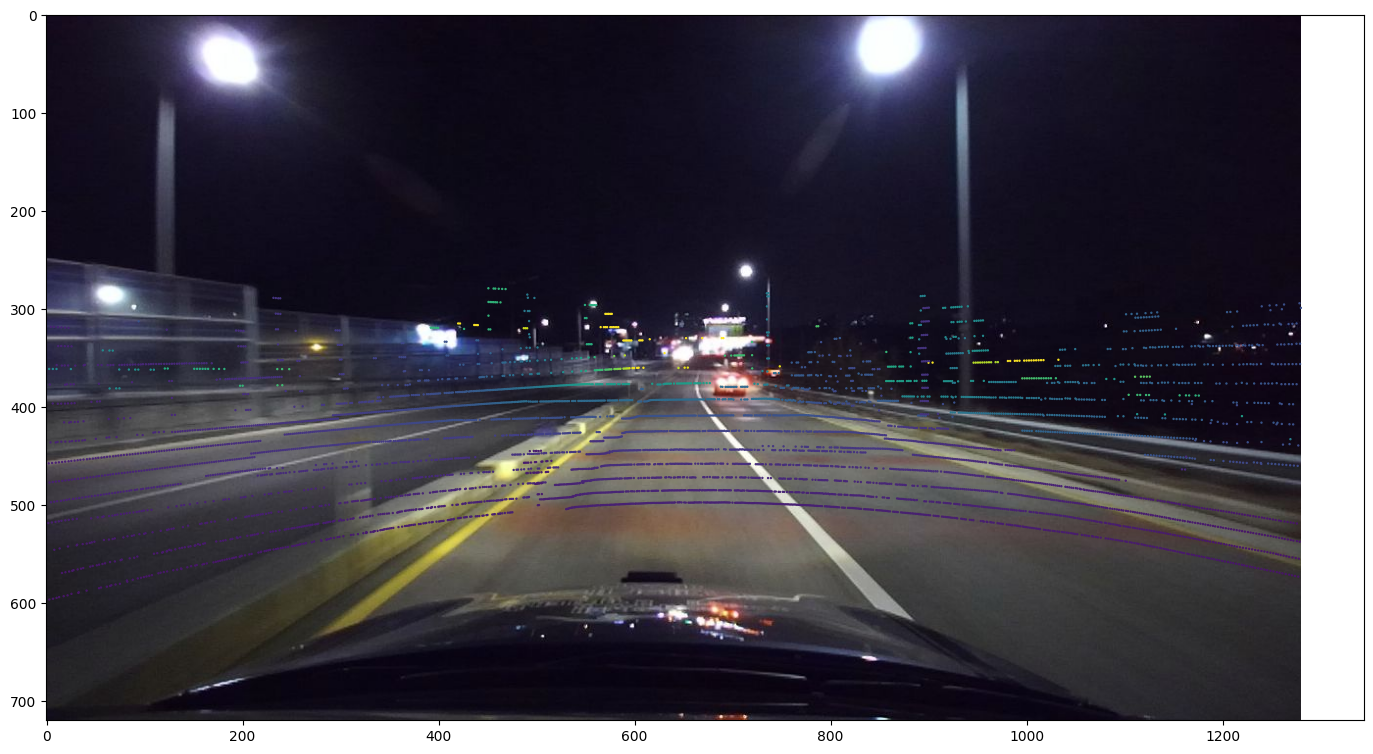

In [14]:
i = 10

viz(image_files[i],pcd_files[i])
print(image_files[i],pcd_files[i])

rename kradar images for gt gen

/mnt/data/DataSet/K-Radar/1/cam-front/cam-front_00001.png

In [40]:
for i in range(1,20):
    folder_path='/mnt/data/DataSet/K-Radar/{}/cam-front/'.format(i)
    image_names = os.listdir(folder_path)
    for iamge_name in image_names:
        iamge_full_path = os.path.join(folder_path,iamge_name)
        iamge_new_path =os.path.join(folder_path,'{}_'.format(i)+iamge_name)
        os.rename(iamge_full_path,iamge_new_path)

In [21]:
from PIL import Image
import numpy as np

def keep_left_half(image_path, output_path):
    # Load the image
    image = Image.open(image_path)
    
    # Convert the image to a NumPy array
    image_array = np.array(image)
    
    # Get the dimensions of the image
    # [2560/720]
    height, width = image_array.shape[:2]
    
    # Keep only the left half of the image
    if width < 1200:
        print(image_path)
        return
    left_half = image_array[:, :1280]

    
    # Convert the NumPy array back to an image
    left_half_image = Image.fromarray(left_half)
    
    # Save the cropped image
    left_half_image.save(output_path)




In [24]:
from multiprocessing import Pool
po = Pool(12)
for i in [1]:
    folder_path='/mnt/data/DataSet/K-Radar/{}/cam-front/'.format(i)
    image_names = os.listdir(folder_path)
    for name in image_names:
        iamge_full_path = os.path.join(folder_path,name)
        # print(iamge_full_path)
        po.apply_async(func=keep_left_half, args=(iamge_full_path, iamge_full_path))
po.close()
po.join()


/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_01498.png
/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00952.png/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00774.png
/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_01474.png/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00553.png/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_01618.png



/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00978.png
/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_01587.png
/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00015.png
/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00215.png/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00901.png

/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00857.png/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_00902.png/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_01178.png


/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_01706.png
/mnt/data/DataSet/K-Radar/1/cam-front/1_cam-front_01389.png
